# Customer Churn in Financial Customer

Churned Customers are those who have decided to end their relationship with their 
existing banking organizations. Churned Customers means a direct loss of Marketing 
Acquisition Cost and possible revenue which could be capitalized post sale. Hence, 
predicting possible customers who can churn beforehand can help us save this loss.

Dataset Description
Input Attributes
1. Customer ID : Unique identification number
2. Surname : Family name
3. Credit score : Banking organization use the credit score to determine the potential 
risk of lending to a customer. The lenders make use of these scores to fix the credit 
limit for all eligible customer.
4. Geography : Country of the customer
5. Gender : Male/Female
6. Age 
7. Tenure : Tenure is the pre-agreed time period (in years) between the lender and 
borrower, for the borrower to repay the principal and interest in full to the lender.
8. Balance : Account balance
9. No of products : Number of services taken by the customer.
10. Has Credit Card : Yes/No
11. Is active member : Yes/No
12. Estimated salary : Salary of the customer
Target / Class Attribute : Exited : Churned/Retained

# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ChurnDataF.csv')

In [3]:
df.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df.shape

(10000, 13)

# Basic information about data - EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [6]:
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
df.describe

<bound method NDFrame.describe of       CustomerId    Surname  CreditScore Geography  Gender  Age  Tenure  \
0       15634602   Hargrave          619    France  Female   42       2   
1       15647311       Hill          608     Spain  Female   41       1   
2       15619304       Onio          502    France  Female   42       8   
3       15701354       Boni          699    France  Female   39       1   
4       15737888   Mitchell          850     Spain  Female   43       2   
...          ...        ...          ...       ...     ...  ...     ...   
9995    15606229   Obijiaku          771    France    Male   39       5   
9996    15569892  Johnstone          516    France    Male   35      10   
9997    15584532        Liu          709    France  Female   36       7   
9998    15682355  Sabbatini          772   Germany    Male   42       3   
9999    15628319     Walker          792    France  Female   28       4   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  Estima

In [8]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [10]:
df = df.drop(['CustomerId'], axis=1 )

In [11]:
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [12]:
#Find the duplicates

df.duplicated().sum()

0

In [13]:
data = df.copy()
data

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Univariate analysis of the data features

Creating BoxPlots to understand their patterns for numerical data

In [14]:
# Find the maximum value of the 'Age' column
max_age = df['Age'].max()
print(max_age)
#Find min value 
min_age = df['Age'].min()
print(min_age)

92
18


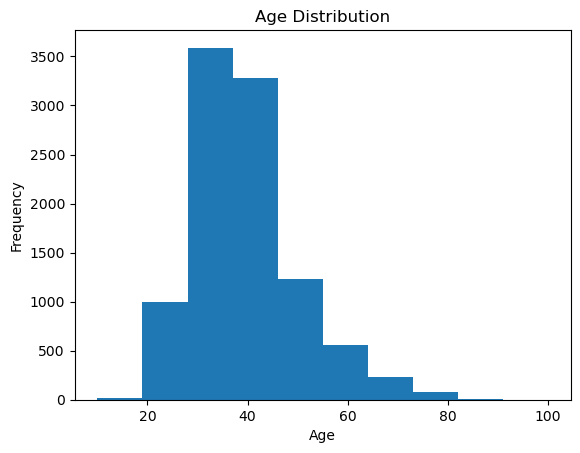

In [15]:
# Univariate analysis of the 'Age' column
# Histogram to visualize the distribution of 'Age'
plt.hist(df['Age'], bins=10,range=[10,100])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [16]:
# Find the maximum value of the 'CreditScore' column
max_score = df['CreditScore'].max()
print(max_score)
#Min value of the Creditscore
min_score = df['CreditScore'].min()
print(min_score)

850
350


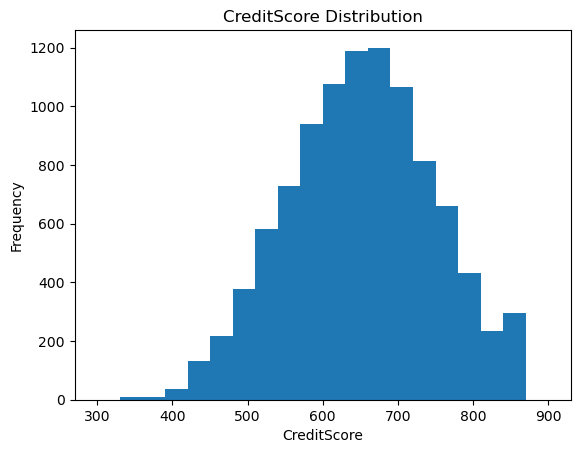

In [17]:
# Univariate analysis of the 'CreditScore' column
# Histogram to visualize the distribution of 'CreditScore'
plt.hist(df['CreditScore'], bins=20,range=[300,900])
plt.xlabel('CreditScore')
plt.ylabel('Frequency')
plt.title('CreditScore Distribution')
plt.show()

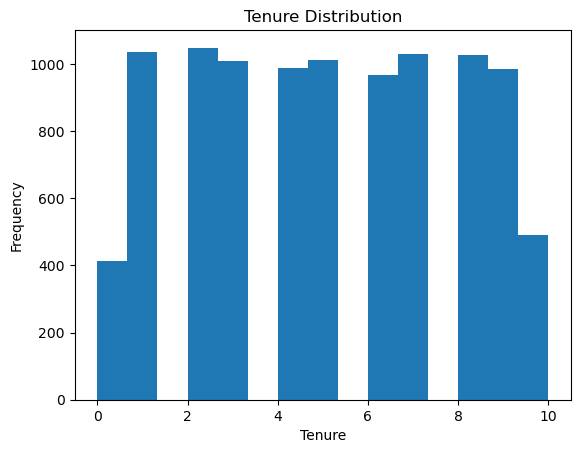

In [18]:
# Univariate analysis of the 'Tenure' column
# Histogram to visualize the distribution of 'Tenure'
plt.hist(df['Tenure'], bins=15)
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Tenure Distribution')
plt.show()

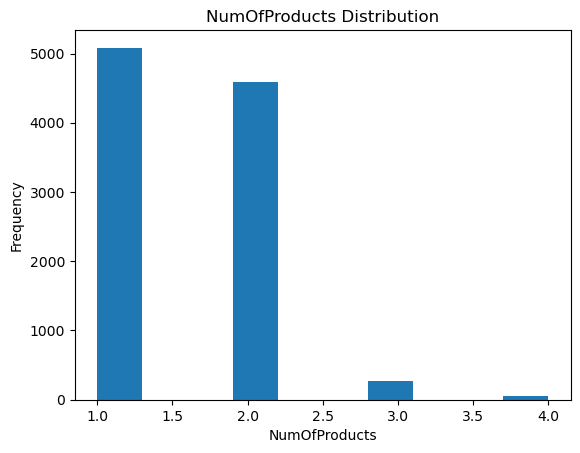

In [19]:
# Univariate analysis of the 'Noofproducts' column
# Histogram to visualize the distribution of 'Noofproducts'
plt.hist(df['NumOfProducts'],bins=10)
plt.xlabel('NumOfProducts')
plt.ylabel('Frequency')
plt.title('NumOfProducts Distribution')
plt.show()

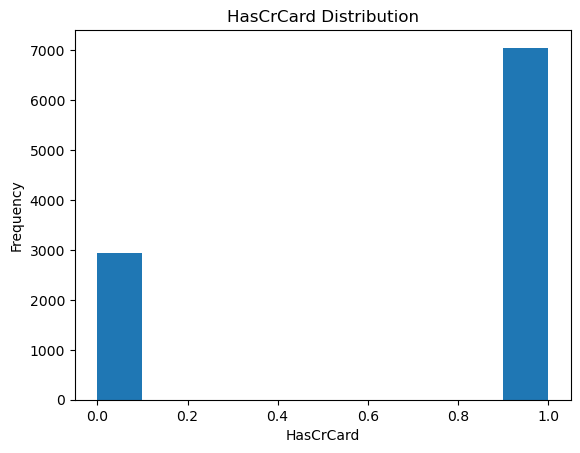

In [20]:
# Univariate analysis of the 'HasCrCard' column
# Histogram to visualize the distribution of 'HasCrCard'
plt.hist(df['HasCrCard'],range=[0,1])
plt.xlabel('HasCrCard')
plt.ylabel('Frequency')
plt.title('HasCrCard Distribution')
plt.show()

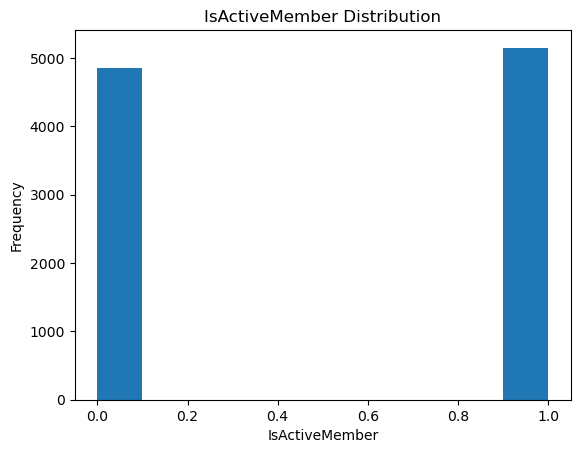

In [21]:
# Univariate analysis of the 'IsActiveMember' column
# Histogram to visualize the distribution of 'IsActiveMember'
plt.hist(df['IsActiveMember'],range=[0,1])
plt.xlabel('IsActiveMember')
plt.ylabel('Frequency')
plt.title('IsActiveMember Distribution')
plt.show()

<Axes: title={'center': 'Frequency Distribution Of Geography'}>

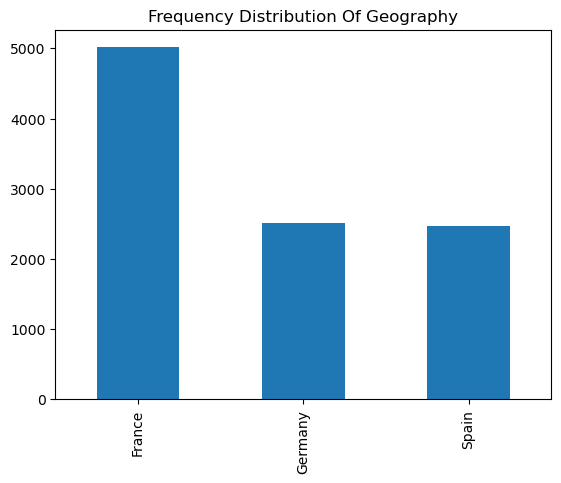

In [22]:
# Graphical representation of the geography using bar chart
df['Geography'].value_counts().plot(kind='bar',y='value_column',title='Frequency Distribution Of Geography')

<Axes: title={'center': 'Frequency Distribution Of Gender'}>

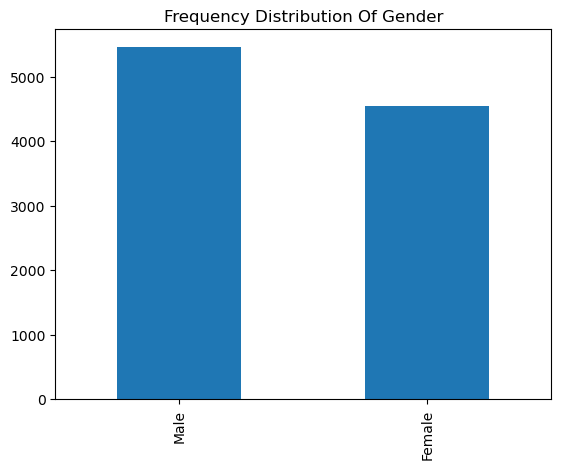

In [23]:
# Graphical representation of the gender using bar chart
df['Gender'].value_counts().plot(kind='bar',y='value_column',title='Frequency Distribution Of Gender')

In [24]:
df = df.drop(['Surname'] , axis=1)

In [25]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Outliers

<Axes: >

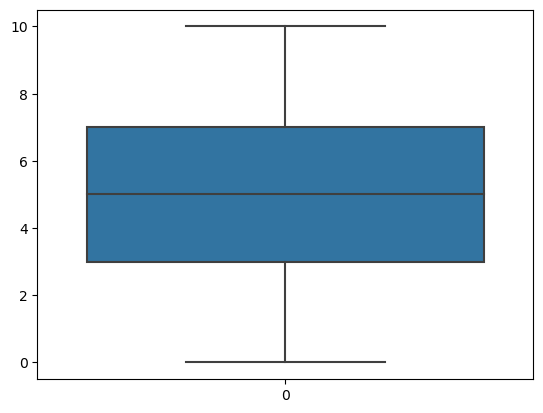

In [39]:
#Detection of outliers in tenure
sns.boxplot(df['Tenure'])

<Axes: >

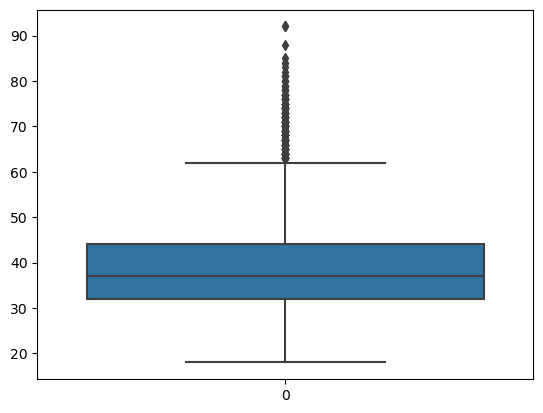

In [40]:
#Detection of outliers in Age
sns.boxplot(df['Age'])

<Axes: >

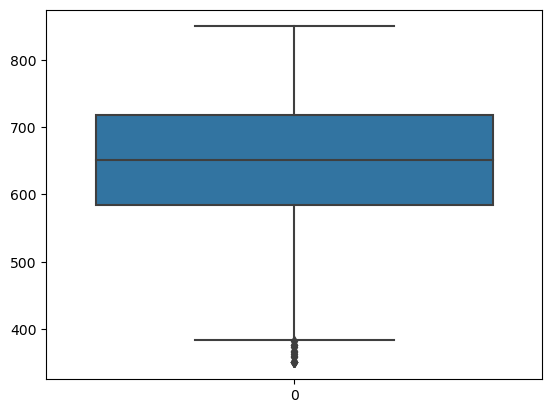

In [41]:
# Detection of outliers in credit score
sns.boxplot(df['CreditScore'])

<Axes: >

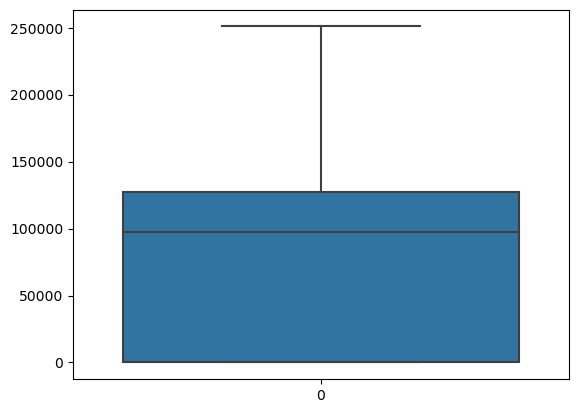

In [43]:
# Detection of outliers in credit score
sns.boxplot(df['Balance'])

# Analysis of the Target Variable - Exited

In [26]:
churn_count = df['Exited'].sum()
retained_count = df.shape[0] - churn_count
churn_ratio = churn_count/ df.shape[0]
retained_ratio = retained_count/ df.shape[0]

In [27]:
churn_ratio

0.2037

In [28]:
retained_ratio

0.7963

Visualize the data

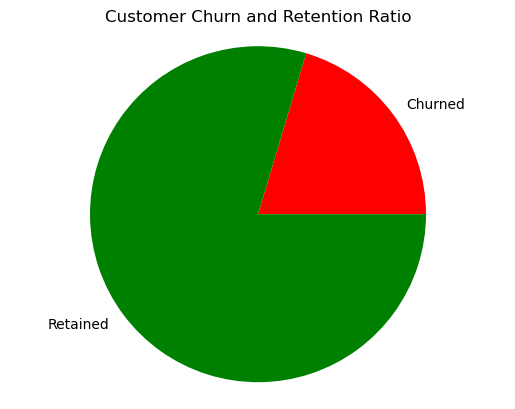

In [29]:
labels = ['Churned', 'Retained']
ratios = [churn_ratio, retained_ratio]
colors = ['red', 'green']

plt.pie(ratios, labels=labels, colors=colors)
plt.axis('equal') 
plt.title('Customer Churn and Retention Ratio')
plt.show()

# Bivariate analysis 
The relation between the target and the rest of the variables

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


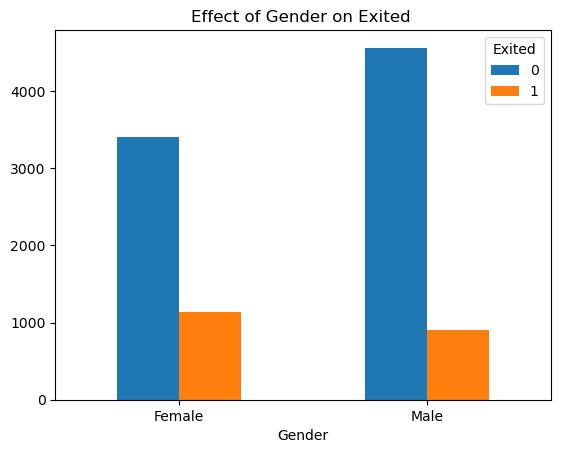

In [30]:
## Graphical representation of Gender against Exited
cross_tab = pd.crosstab(df["Gender"],df["Exited"])
cross_tab.plot.bar(rot=0)
plt.title("Effect of Gender on Exited ")
cross_tab


Exited,0,1
HasCrCard,,
0,2332,613
1,5631,1424


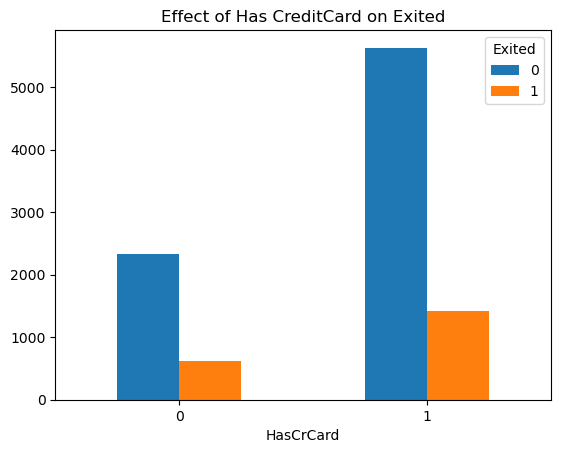

In [31]:
## Graphical representation of Creditcard against Exited
cross_tab = pd.crosstab(df['HasCrCard'],df['Exited'])
cross_tab.plot.bar(rot=0)
plt.title("Effect of Has CreditCard on Exited")
cross_tab

Exited,0,1
IsActiveMember,,
0,3547,1302
1,4416,735


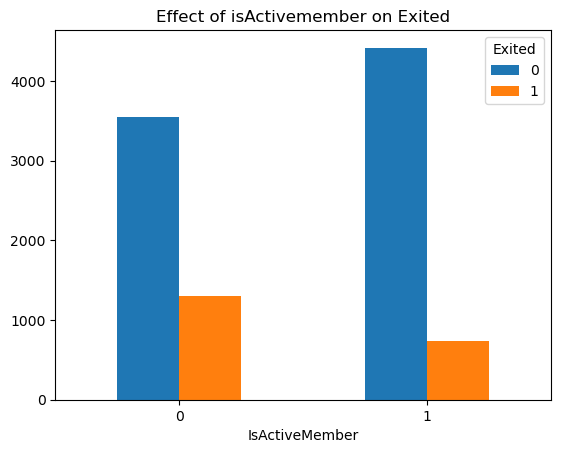

In [32]:
## Graphical representation of ActiveMember against Exited
cross_tab = pd.crosstab(df['IsActiveMember'],df['Exited'])
cross_tab.plot.bar(rot=0)
plt.title("Effect of isActivemember on Exited")
cross_tab

Exited,0,1
NumOfProducts,,
1,3675,1409
2,4242,348
3,46,220
4,0,60


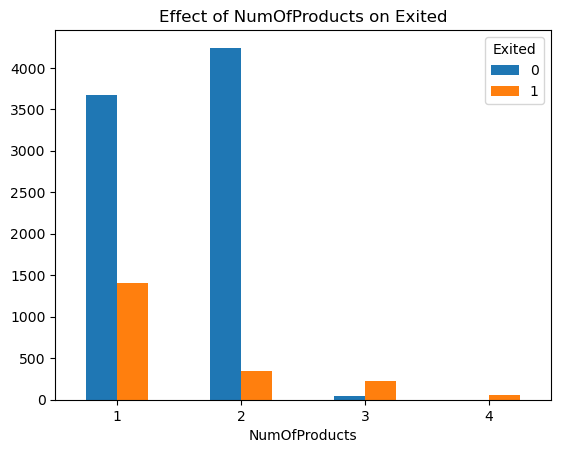

In [33]:
## Graphical representation of ActiveMember against Exited
cross_tab = pd.crosstab(df['NumOfProducts'],df['Exited'])
cross_tab.plot.bar(rot=0)
plt.title("Effect of NumOfProducts on Exited")
cross_tab

Exited,0,1
Tenure,,
0,318,95
1,803,232
2,847,201
3,796,213
4,786,203
5,803,209
6,771,196
7,851,177
8,828,197


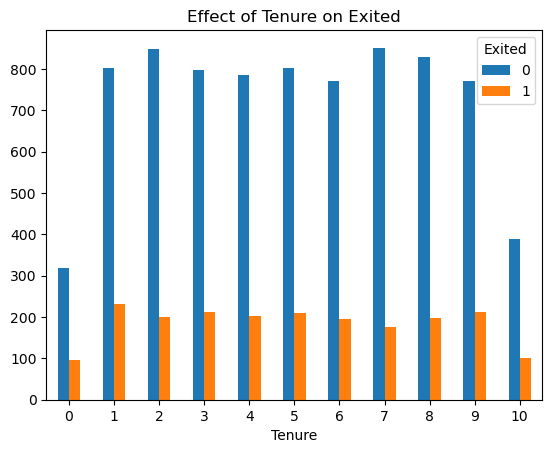

In [34]:
## Graphical representation of Tenure against Exited
cross_tab = pd.crosstab(df['Tenure'],df['Exited'])
cross_tab.plot.bar(rot=0)
plt.title("Effect of Tenure on Exited")
cross_tab

# For Continous Data vs Discrete data

box plots

count plots

swam plots

bar plots

scatter plots

will be the best to depict the realtionships between them.

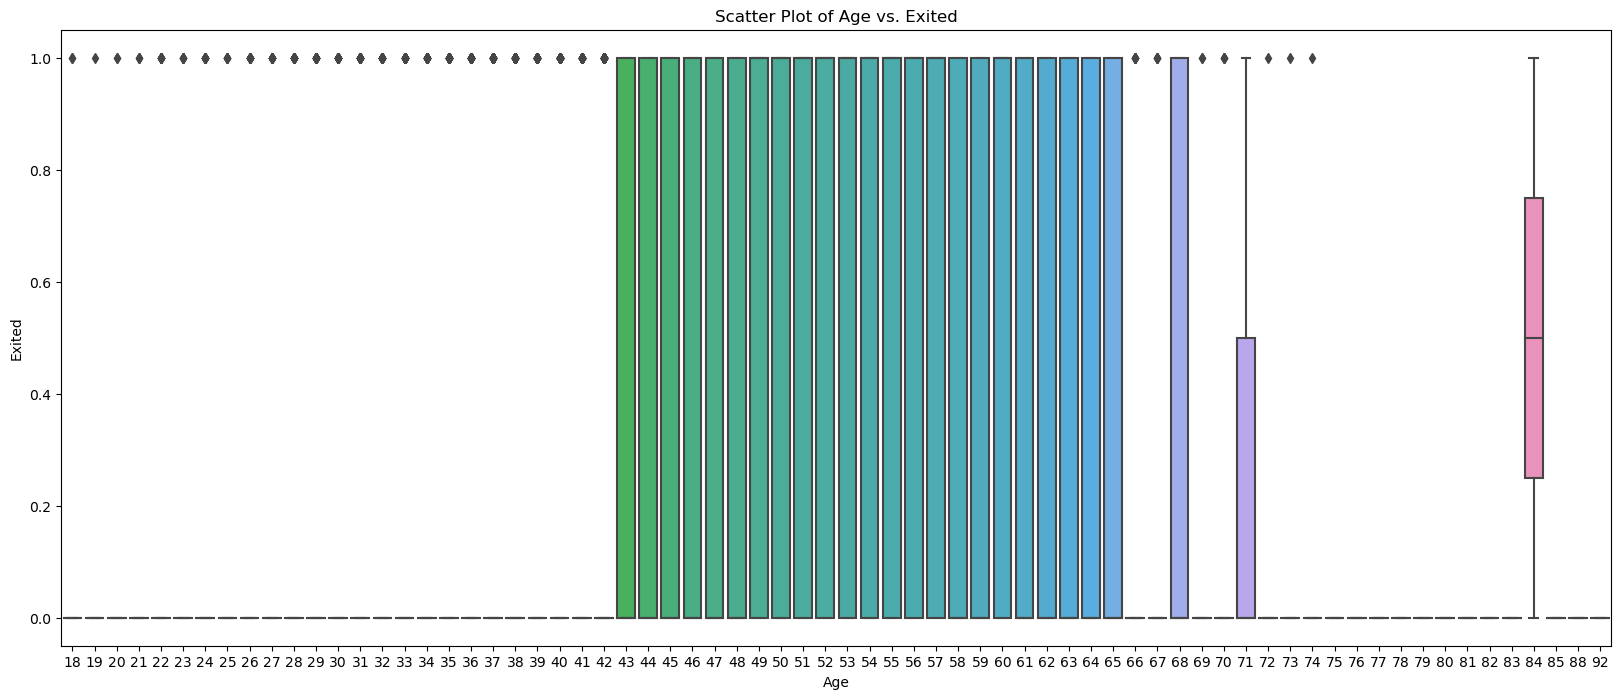

In [35]:
#Box plot for age on exited

plt.figure(figsize=(20, 8))
sns.boxplot(x='Age', y='Exited', data=df)
plt.title("Scatter Plot of Age vs. Exited")
plt.xlabel("Age")
plt.ylabel("Exited")
plt.show()

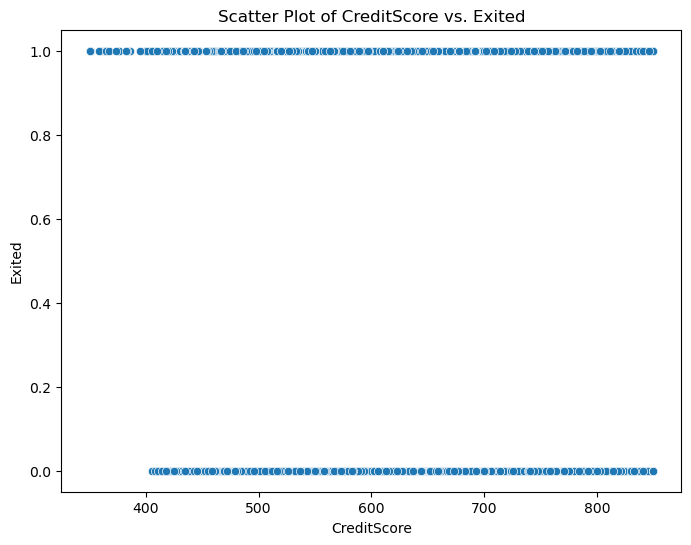

In [36]:
#Scatter plot of credit score vs exited
plt.figure(figsize=(8,6))
sns.scatterplot(x='CreditScore', y='Exited', data=df)
plt.title("Scatter Plot of CreditScore vs. Exited")
plt.xlabel("CreditScore")
plt.ylabel("Exited")
plt.show()

# Feature Engineering

1. Handling of the missing values
		
        No missing values were present, all data preprocessing was done.

2. Lable Encoding of the Data

		Geography and Gender are categorical data that need to be encoded and converted into numerical data.

3. Feature Selection

		Selection of the features that affect the target variable more than the others and hve less bias.

In [44]:
#Converting the Categorical data into Numerical Data
from sklearn.preprocessing import LabelEncoder

# Converting categorical columns to numerical columns
encoder = LabelEncoder()
df["Gender"] = encoder.fit_transform(df["Gender"])
df["Geography"] = encoder.fit_transform(df["Geography"])

In [45]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
